##### Sundec correction

In [1]:
import pmagpy.pmag as pmag
sundata={'delta_u':3,'lat':35,'lon':33,\
         'date':'1994:05:23:16:9','shadow_angle':68}
print ('Sun corrected azimuth = %7.1f'%(pmag.dosundec(sundata)))

Sun corrected azimuth =   154.2


##### Day Plot and other magnetic property graphs

Exp function coefficients:
[ 1.76791392 -1.05372927]


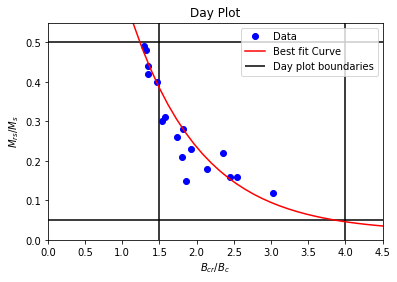

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
import numpy

file = open("Samples_table_Python.txt", "r")
from pylab import *

x = []
y = []
Name = []
n = 3
for line in file:
    try:
        num  = line.split( )
        if len(num) != 20:
            raise ValueError
        else:
            n+=1
        x1 = float(num[18])
        y1 = float(num[17])
        Name1 = num[0]
        x.append(x1)
        y.append(y1)
        Name.append(Name1)
    except:
        continue
file.close()

x = array(x)
y = array(y)
#Name = ['AF9', 'AF10', 'AV', 'C1', 'D1', 'D2', 'D3', 'D4', 'D5', 'H1', 'OP1', 'PP1', 'T1', 'T2', 'TR1', 'TR2', 'VA']

plt.xlabel('$B_{cr}$/$B_c$')
plt.ylabel('$M_{rs}$/$M_s$')
plt.title('Day Plot')
plt.hlines(0.5, 0, 5, label="Day plot boundaries")       # Day plot lines
plt.hlines(0.05, 0, 5)
plt.vlines(1.5, 0, 0.6)
plt.vlines(4, 0, 0.6)
plt.ylim(0, 0.55)
plt.xlim(0, 4.5)

#for i, txt in enumerate(Name):              # Label points
 #   plt.annotate(txt, (x[i], y[i]))

plt.plot(x, y, 'o', color ='blue', label ="Data") # Plot data


# Calculate best fit line, assuming exponential
 
t = np.linspace(0, 4.5, num = 40) 

def test(t, a, b): 
    return a*np.exp(b*t)

param, param_cov = curve_fit(test, x, y) 
 
print("Exp function coefficients:") 
print(param) 
#print("Covariance of coefficients:") 
#print(param_cov) 

ans = (param[0]*(np.exp(param[1]*t))) + 0.02

plt.plot(t, ans, color ='red', label ="Best fit Curve")
plt.legend() 
#plt.savefig('Figures/Day_plot.png')
plt.show()

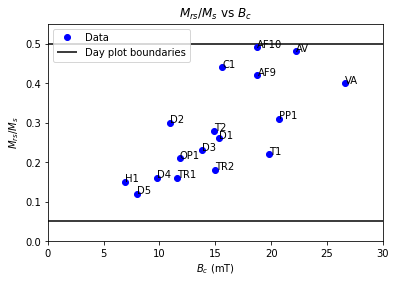

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
import numpy

file = open("Samples_table_Python.txt", "r")
from pylab import *

x = []
y = []
Name = []
n = 3
for line in file:
    try:
        num  = line.split( )
        if len(num) != 20:
            raise ValueError
        else:
            n+=1
        x1 = float(num[15])
        y1 = float(num[17])
        Name1 = num[0]
        x.append(x1)
        y.append(y1)
        Name.append(Name1)
    except:
        continue
file.close()

x = array(x)
y = array(y)

plt.xlabel('$B_c$ (mT)')
plt.ylabel('$M_{rs}$/$M_s$')
plt.title('$M_{rs}$/$M_s$ vs $B_c$')
plt.hlines(0.5, 0, 30, label="Day plot boundaries")       # Day plot lines
plt.hlines(0.05, 0, 30)
plt.ylim(0, 0.55)
plt.xlim(0, 30)

for i, txt in enumerate(Name):              # Label points
    plt.annotate(txt, (x[i], y[i]))

plt.plot(x, y, 'o', color ='blue', label ="Data") # Plot data

plt.legend() 
#plt.savefig('Figures/Bc_MrsMr.png')
plt.show()

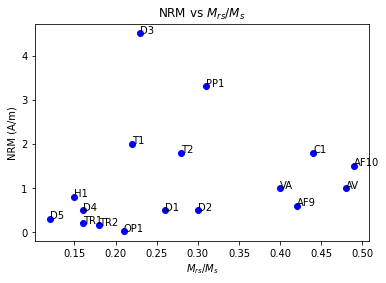

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
import numpy

file = open("Samples_table_Python.txt", "r")
from pylab import *

x = []
y = []
Name = []
n = 3
for line in file:
    try:
        num  = line.split( )
        if len(num) != 20:
            raise ValueError
        else:
            n+=1
        x1 = float(num[17])
        Name1 = num[0]
        x.append(x1)
        Name.append(Name1)
    except:
        continue
file.close()

x = array(x)
#['D1', 'OP1', 'D2', 'TR1', 'AF10', 'D3', 'H1', 'TR2', 'PP1', 'C1', 'AF9', 'VA', 'D5', 'D4', 'AV', 'T2', 'T1']
NRM = [0.5, 0.02, 0.5, 0.2, 1.5, 4.5, 0.8, 0.15, 3.3, 1.8, 0.6, 1, 0.3, 0.5, 1, 1.8, 2]

plt.xlabel('$M_{rs}$/$M_s$')
plt.ylabel('NRM (A/m)')
plt.title('NRM vs $M_{rs}$/$M_s$')

for i, txt in enumerate(Name):              # Label points
    plt.annotate(txt, (x[i], NRM[i]))

plt.plot(x, NRM, 'o', color ='blue', label ="Data") # Plot data
#plt.yscale('log')
#plt.xscale('log')
#plt.legend() 
#plt.savefig('Figures/NRM_MrsMr.png')
plt.show()

##### Curie Temperature and Susceptibility analysis

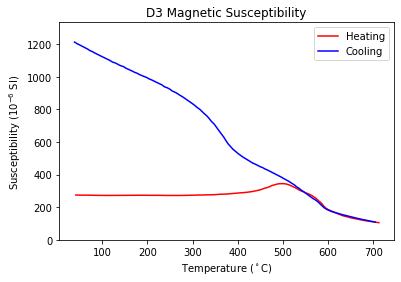

1st derivative maximum for heating = 475.0degC
1st derivative minimum for heating = 585degC
1st derivative maximum for cooling = 369degC


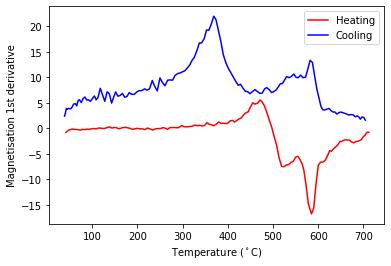

2nd derivative maximum for heating = 595degC
2nd derivative maximum for cooling = 592degC
2nd derivative maximum for cooling = 592degC


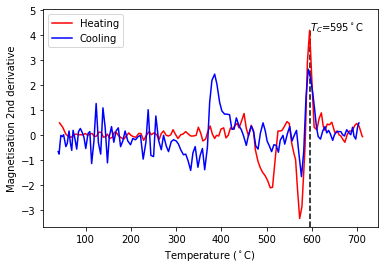

In [5]:
# Plot MFK1 data and find curie temp from 2nd derivative maximum

%matplotlib inline
import matplotlib.pyplot as plt

file = open("MFK1/D3B-endstub.cur.dat", "r") # read in data
from pylab import *

T = []
M = []
n = 0
for line in file:
    try:
        num  = line.split()
        if len(num) != 2:
            raise ValueError
        else:
            n+=1
        T1 = float(num[0])
        M1 = float(num[1])
        T.append(T1)
        M.append(M1)
    except:
        continue
file.close()

T = array(T)
M = array(M)

T_up = T[3:(int(len(T)/2)-3)] # Split in to heating and cooling
T_down = T[int(len(T)/2):]
M_up = M[3:int(len(T)/2)-3]
M_down = M[int(len(T)/2):]

plt.plot(T_up, M_up, color='r',label='Heating') # Plot data
plt.plot(T_down, M_down, color='blue',label='Cooling')
plt.xlabel('Temperature ($^\circ$C)')
plt.title('D3 Magnetic Susceptibility')
plt.ylabel('Susceptibility ($10^{-6}$ SI)')
plt.ylim(0, 1.1*max(M))
plt.legend()
plt.savefig('Figures/Used/T1_Susceptibility.png')
plt.show()

dMdT_up = gradient(M_up)   # Get first derivative of data
dMdT_down = gradient(M_down)
dMdT_upi = min(dMdT_up)
dMdT_downi = max(dMdT_down)

for i in range(len(dMdT_up)):
    if dMdT_up[i] == dMdT_upi:
        T_upi = T_up[i]
    if dMdT_down[i] == dMdT_downi:
        T_downi = T_down[i]
    if M_up[i] == max(M_up):
        print('1st derivative maximum for heating = {}degC'.format(T_up[i-4]))
        
print('1st derivative minimum for heating = {}degC'.format(int(T_upi)))
print('1st derivative maximum for cooling = {}degC'.format(int(T_downi)))

plt.plot(T_up, dMdT_up, color='r',label='Heating')   # plot 1st derivative
plt.plot(T_down, dMdT_down, color='blue',label='Cooling')
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Magnetisation 1st derivative')
plt.legend()
plt.show()

d2MdT2_up = gradient(dMdT_up)   # Get second derivative of data
d2MdT2_down = gradient(dMdT_down)
d2MdT2_upi = max(d2MdT2_up)
d2MdT2_downi = max(abs(d2MdT2_down))
d2MdT2_downii = max(d2MdT2_down)

for i in range(len(d2MdT2_up)):
    if d2MdT2_up[i] == d2MdT2_upi:
        T_upi = T_up[i]
    if d2MdT2_down[i] == d2MdT2_downi:
        T_downi = T_down[i]
    if d2MdT2_down[i] == d2MdT2_downii:
        T_downii = T_down[i]

print('2nd derivative maximum for heating = {}degC'.format(int(T_upi)))
print('2nd derivative maximum for cooling = {}degC'.format(int(T_downi)))
print('2nd derivative maximum for cooling = {}degC'.format(int(T_downii)))

plt.plot(T_up, d2MdT2_up, color='r',label='Heating')   # plot 2nd derivative
plt.plot(T_down, d2MdT2_down, color='blue',label='Cooling')
plt.vlines(T_upi, 1.1*min(d2MdT2_up), d2MdT2_upi, linestyle='--')
plt.annotate('$T_C$={}$^\circ$C'.format(int(T_upi)), (T_upi, d2MdT2_upi))
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Magnetisation 2nd derivative')
plt.ylim(1.1*min(d2MdT2_up), 1.2*max(d2MdT2_up))
plt.legend()
plt.show()

##### IRM analysis

SIRM = 3.4943


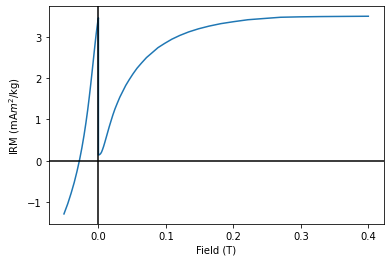

In [6]:
# Plot .coe and .irm data

%matplotlib inline
import matplotlib.pyplot as plt

file = open("VSM/Analyzer-Files/TR1G-ra.coe.dat", "r")
from pylab import *

x = []
y = []
n = 0
for line in file:
    try:
        num  = line.split()
        if len(num) != 2:
            raise ValueError
        else:
            n+=1
        x1 = float(num[0])
        y1 = float(num[1])
        x.append(x1)
        y.append(y1*1000)
    except:
        continue
file.close()

x = x[::-1]
y = y[::-1]


file = open("VSM/Analyzer-Files/TR1G-ra.irm.dat", "r")
from pylab import *

n = 0
for line in file:
    try:
        num  = line.split()
        if len(num) != 2:
            raise ValueError
        else:
            n+=1
        x1 = float(num[0])
        y1 = float(num[1])
        x.append(x1)
        y.append(y1*1000)
    except:
        continue
file.close()

x = array(x)
y = array(y)

print('SIRM = {}'.format(max(y)))

plt.plot(x, y)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('Field (T)')
plt.ylabel('IRM (mA$m^2$/kg)')
#plt.savefig('Figures/T1G_irmcoe.png')
plt.show()

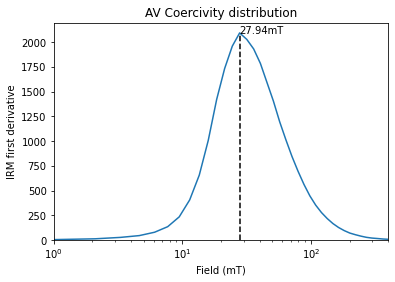

In [10]:
# IRM analysis for coercivity distribution

%matplotlib inline
import matplotlib.pyplot as plt

file = open("VSM/Analyzer-Files/AV1-ra.irm.dat", "r")
from pylab import *

x = []
y = []
n = 0
for line in file:
    try:
        num  = line.split()
        if len(num) != 2:
            raise ValueError
        else:
            n+=1
        x1 = float(num[0])
        y1 = float(num[1])
        x.append(x1*1000)
        y.append(y1*1000000)
    except:
        continue
file.close()


x = array(x)
y = array(y)

dydx = gradient(y)
dydxi = max(dydx)
#dydxi2 = dydxi/2

for i in range(len(dydx)):
    if dydx[i] == dydxi:
        xi = x[i]

# plot
plt.plot(x, dydx)
plt.annotate('{}mT'.format(round(xi, 2)), (xi, dydxi))
plt.vlines(xi, 0, dydxi, linestyle='--')
#plt.hlines(dydxi/2, xi, xi2)
plt.xlabel('Field (mT)')
plt.ylabel('IRM first derivative')
plt.title('AV Coercivity distribution')
plt.xscale('log')
plt.xlim(1, 400)
plt.ylim(0, (max(dydx)+(0.05*max(dydx))))
#plt.savefig('Figures/T1G_coedist.png')
plt.show()